In [1]:
# Add relevant Jupyter notebook extensions
%load_ext autoreload
%autoreload 2

In [2]:
# You can double-check your Python path like this...
import sys  
print(sys.path)

['/opt/homebrew/Cellar/python@3.12/3.12.6/Frameworks/Python.framework/Versions/3.12/lib/python312.zip', '/opt/homebrew/Cellar/python@3.12/3.12.6/Frameworks/Python.framework/Versions/3.12/lib/python3.12', '/opt/homebrew/Cellar/python@3.12/3.12.6/Frameworks/Python.framework/Versions/3.12/lib/python3.12/lib-dynload', '', '/Users/jinrhee/.venvs/b1-scientific-computing/lib/python3.12/site-packages', '/Users/jinrhee/Desktop/Oxford/Engineering Science/2024-25/B Papers/B1 Engineering Computation/Scientific Coding/b1-coding-practical-mt24']


# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

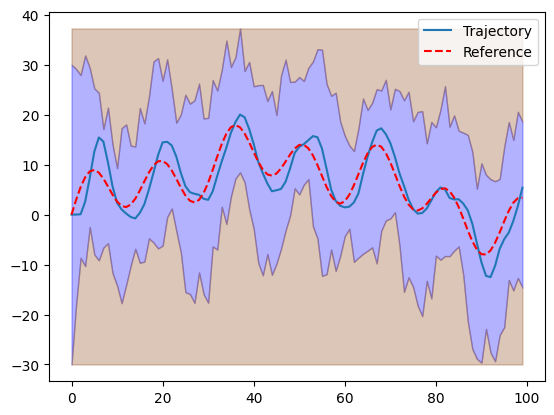

In [3]:
# Import relevant modules
from uuv_mission.control import *
from uuv_mission.dynamic import *
from uuv_mission.terrain import *

sub = Submarine()
controller = Controller()
closed_loop = ClosedLoop(sub, controller)
mission = Mission.from_csv("data/mission.csv")
trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)

[Kp, Kd]: -0.050 -0.150 error: 6891412655.545 over 100 iterations
[Kp, Kd]: -0.050 0.017 error: 40268984.472 over 100 iterations
[Kp, Kd]: -0.050 0.183 error: 935894.857 over 100 iterations
[Kp, Kd]: -0.050 0.350 error: 47712.709 over 100 iterations
[Kp, Kd]: -0.050 0.517 error: 7599.212 over 100 iterations
[Kp, Kd]: -0.050 0.683 error: 2060.438 over 100 iterations
[Kp, Kd]: -0.050 0.850 error: 748.001 over 100 iterations
[Kp, Kd]: -0.050 1.017 error: 404.458 over 100 iterations
[Kp, Kd]: -0.050 1.183 error: 3842.078 over 100 iterations
[Kp, Kd]: -0.050 1.350 error: 2021673.048 over 100 iterations
[Kp, Kd]: -0.006 -0.150 error: 169407.667 over 100 iterations
[Kp, Kd]: -0.006 0.017 error: 1259.443 over 100 iterations
[Kp, Kd]: -0.006 0.183 error: 191.758 over 100 iterations
[Kp, Kd]: -0.006 0.350 error: 117.588 over 100 iterations
[Kp, Kd]: -0.006 0.517 error: 77.847 over 100 iterations
[Kp, Kd]: -0.006 0.683 error: 52.579 over 100 iterations
[Kp, Kd]: -0.006 0.850 error: 47.452 over 10

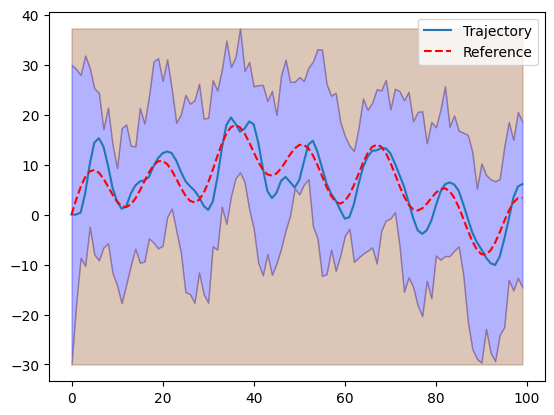

In [6]:
# Test for adjusted gains
kps = np.linspace(-0.2, 0.2, 10) + 0.15
kds = np.linspace(-0.75, 0.75, 10)+ 0.6

iter_num = 100  # times to repeat simulation for each gain combination
mission = Mission.from_csv("data/mission.csv")  # Mission data is reused
sub = Submarine()
controller = Controller()

avg_error_vec = np.empty((0,1))  # Store data from tests
kd_vec = np.empty((0,1))
kp_vec = np.empty((0,1))

for kp in kps:
    for kd in kds:  # Interate through all possible pairs
        error = 0
        for _ in range(iter_num):
            controller.set_prev_error(0)  # Reset controller
            controller.set_gains(kp, kd)

            closed_loop = ClosedLoop(sub, controller)  # Set loop and simulate
            trajectory = closed_loop.simulate_with_random_disturbances(mission)
            error = error + trajectory.get_traj_error(mission)  # Accumulate error
            
        avg_error = error / iter_num
        avg_error_vec = np.append(avg_error_vec, avg_error)  # Store average error and control gain pair
        kp_vec = np.append(kp_vec, kp)
        kd_vec = np.append(kd_vec, kd)

        message = f"[Kp, Kd]: {kp:.3f} {kd:.3f} error: {avg_error:.3f} over {iter_num} iterations"
        print(message)

idx = np.argmin(avg_error_vec)
message = f"Best gains [Kp, Kd]:{kp_vec[idx]:.3f}, {kd_vec[idx]:.3f} with average error of {avg_error_vec[idx]:.4f}"
print(message)

# Plot best control gain pair
controller.set_prev_error(0)  # Reset controller
controller.set_gains(kp_vec[idx], kd_vec[idx])
closed_loop = ClosedLoop(sub, controller)  # Set loop and simulate
trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)